In [2]:
import pandas as pd
excel_path = 'predictions.xlsx'
predictions_df = pd.read_excel(excel_path)
shuffled_predictions_df = predictions_df.sample(frac=1).reset_index(drop=True)
shuffled_excel_path = 'shuffled_predictions.xlsx'
shuffled_predictions_df.to_excel(shuffled_excel_path, index=False)
print(f"Shuffled records saved to '{shuffled_excel_path}'")

Shuffled records saved to 'shuffled_predictions.xlsx'


In [3]:
import imblearn
print(imblearn.__version__)

0.10.1


Class=3, n=99 (19.800%)
Class=4, n=213 (42.600%)
Class=2, n=100 (20.000%)
Class=1, n=59 (11.800%)
Class=0, n=29 (5.800%)


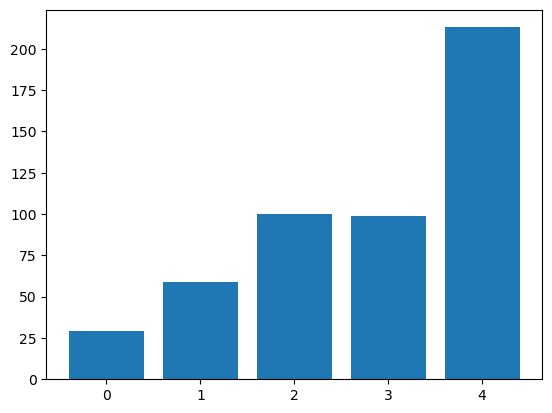

In [4]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel('shuffled_predictions.xlsx')
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [5]:
df.to_excel('balanced_dataset.xlsx', index=False,float_format='%f')

Class=3, n=213 (20.000%)
Class=4, n=213 (20.000%)
Class=2, n=213 (20.000%)
Class=1, n=213 (20.000%)
Class=0, n=213 (20.000%)


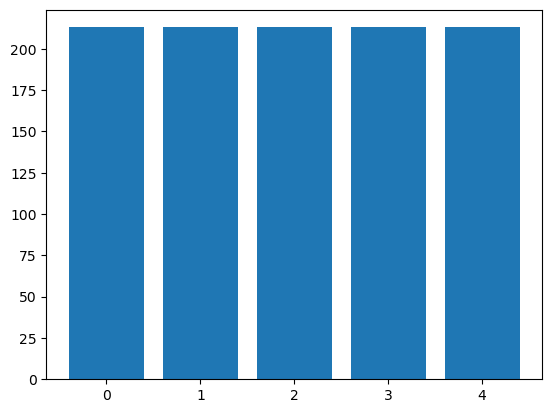

In [6]:
# example of oversampling a multi-class classification dataset
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel('shuffled_predictions.xlsx')
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)
X_resampled[:, 5] = X_resampled[:, 5].astype(int)
# Round 'Gender' and 'PI' columns to 0 or 1
X_resampled[:, 6] = X_resampled[:, 6].round()
X_resampled[:, 7] = X_resampled[:, 7].round()
# Summarize distribution
counter = Counter(y_resampled)
for k, v in counter.items():
    per = v / len(y_resampled) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# Plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Save the resampled dataset
resampled_df = pd.DataFrame(X_resampled, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'Age', 'Gender', 'PI', 'Height (feet)', 'Weight (kg)', 'BMI'])
resampled_df['class'] = y_resampled
resampled_df = resampled_df.sample(frac=1).reset_index(drop=True)
resampled_df.to_excel('balanced_dataset.xlsx', index=False,float_format='%f')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
df = pd.read_excel('balanced_dataset.xlsx')

In [9]:
df.head()

,P1,P2,P3,P4,P5,Age,Gender,PI,Height (feet),Weight (kg),BMI,class
0,0.196419,0.654267,0.148739,0.000365,0.000209,43,1,0,4.810000,61.740000,28.740000,3
1,0.681098,0.300609,0.018292,0.000001,0.000000,22,1,1,6.410000,96.090000,25.140000,2
2,0.884796,0.030187,0.085015,0.000002,0.000000,20,1,0,6.267416,104.983518,28.759499,2
3,0.639305,0.261000,0.099618,0.000074,0.000002,40,1,0,5.554528,51.653816,18.106466,1
4,0.000003,0.000026,0.000248,0.075034,0.924689,73,1,0,6.070000,125.020000,36.540000,4


In [10]:
df.dtypes

P1               float64
P2               float64
P3               float64
P4               float64
P5               float64
Age                int64
Gender             int64
PI                 int64
Height (feet)    float64
Weight (kg)      float64
BMI              float64
class              int64
dtype: object

In [11]:
df.describe()

,P1,P2,P3,P4,P5,Age,Gender,PI,Height (feet),Weight (kg),BMI,class
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,0.444712,0.186129,0.163600,0.113491,0.092068,47.435681,0.629108,0.114554,5.621821,69.399579,23.493759,2.000000
std,0.380647,0.206563,0.227021,0.258897,0.244727,19.939991,0.483271,0.318633,0.529491,25.345457,7.274456,1.414878
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,4.590000,30.490000,15.070000,0.000000
25%,0.023317,0.023982,0.008473,0.000005,0.000000,30.000000,0.000000,0.000000,5.198192,51.460000,17.070373,1.000000
50%,0.416940,0.109154,0.074610,0.000331,0.000004,43.000000,1.000000,0.000000,5.640000,61.235772,21.468776,2.000000
75%,0.847726,0.284763,0.218901,0.046424,0.006781,64.000000,1.000000,0.000000,6.070000,83.508618,28.397509,3.000000
max,0.999598,0.986376,0.999996,0.999988,1.000000,89.000000,1.000000,1.000000,6.570000,151.070000,39.980000,4.000000


In [12]:
df.shape

(1065, 12)

In [13]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 P1               0
P2               0
P3               0
P4               0
P5               0
Age              0
Gender           0
PI               0
Height (feet)    0
Weight (kg)      0
BMI              0
class            0
dtype: int64


In [14]:
#Removing any duplicates(if containes):
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df

,P1,P2,P3,P4,P5,Age,Gender,PI,Height (feet),Weight (kg),BMI,class
0,0.196419,0.654267,0.148739,0.000365,0.000209,43,1,0,4.810000,61.740000,28.740000,3
1,0.681098,0.300609,0.018292,0.000001,0.000000,22,1,1,6.410000,96.090000,25.140000,2
2,0.884796,0.030187,0.085015,0.000002,0.000000,20,1,0,6.267416,104.983518,28.759499,2
3,0.639305,0.261000,0.099618,0.000074,0.000002,40,1,0,5.554528,51.653816,18.106466,1
4,0.000003,0.000026,0.000248,0.075034,0.924689,73,1,0,6.070000,125.020000,36.540000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.750385,0.186115,0.063476,0.000023,0.000001,41,1,0,5.980000,50.190000,15.130000,1
1061,0.583376,0.316212,0.100387,0.000024,0.000001,21,1,0,5.160000,57.720000,23.310000,1
1062,0.067792,0.049848,0.091686,0.046366,0.744309,37,0,0,5.060000,94.120000,39.570000,4
1063,0.006567,0.014896,0.165627,0.812876,0.000035,62,1,0,6.570000,136.140000,33.940000,4


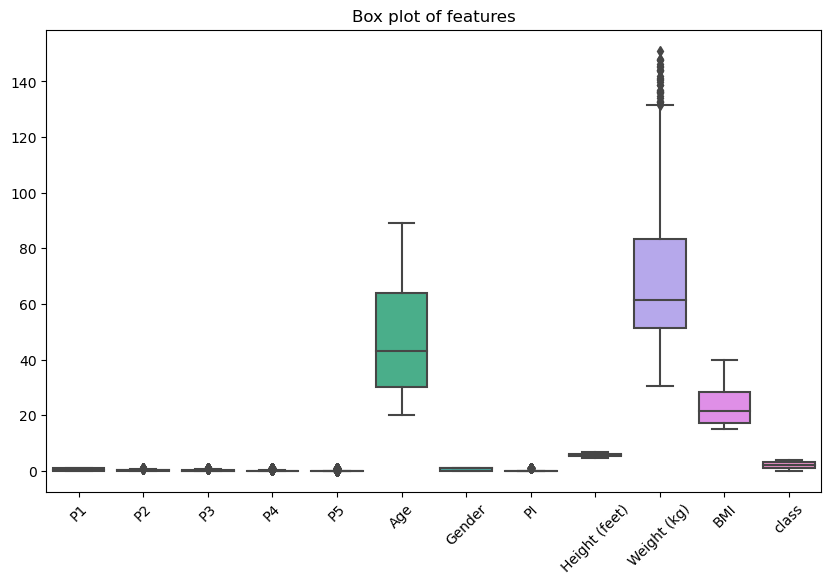

In [17]:
# Outlier detection using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box plot of features")
plt.xticks(rotation=45)
plt.show()

In [18]:
#Checking outliers by z-score
from scipy import stats

# Exclude non-numeric columns like "class", "Gender", and "PI"
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))

threshold = 3
outliers = np.where(z_scores > threshold)
print("Outliers indices:", outliers[0])

Outliers indices: [   4   11   12   18   25   28   45   60   63   83   92   97  105  116
  130  136  137  146  148  152  154  161  165  167  167  174  183  187
  190  195  206  210  221  226  227  234  244  249  253  256  258  260
  289  295  298  309  324  346  349  361  369  370  371  378  385  388
  394  409  412  418  426  429  433  436  438  441  448  449  451  455
  456  460  463  478  496  499  502  506  513  514  515  527  534  537
  539  543  545  548  561  564  567  574  581  587  594  599  604  605
  614  615  616  618  626  637  653  657  661  686  697  702  704  710
  715  716  722  731  739  743  748  750  764  767  786  787  791  793
  809  814  819  820  827  828  835  837  845  846  869  870  871  874
  876  880  890  902  913  915  916  921  932  946  947  963  972  976
  983  988  995  996  996  998 1025 1038 1051 1056 1058]


In [19]:
# Removing outliers
cleaned_df = df.drop(outliers[0])

In [20]:
df = cleaned_df

In [21]:
df

,P1,P2,P3,P4,P5,Age,Gender,PI,Height (feet),Weight (kg),BMI,class
0,0.196419,0.654267,0.148739,0.000365,0.000209,43,1,0,4.810000,61.740000,28.740000,3
1,0.681098,0.300609,0.018292,0.000001,0.000000,22,1,1,6.410000,96.090000,25.140000,2
2,0.884796,0.030187,0.085015,0.000002,0.000000,20,1,0,6.267416,104.983518,28.759499,2
3,0.639305,0.261000,0.099618,0.000074,0.000002,40,1,0,5.554528,51.653816,18.106466,1
5,0.070044,0.471333,0.383968,0.073642,0.001013,88,1,0,5.270000,68.610000,26.630000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.750385,0.186115,0.063476,0.000023,0.000001,41,1,0,5.980000,50.190000,15.130000,1
1061,0.583376,0.316212,0.100387,0.000024,0.000001,21,1,0,5.160000,57.720000,23.310000,1
1062,0.067792,0.049848,0.091686,0.046366,0.744309,37,0,0,5.060000,94.120000,39.570000,4
1063,0.006567,0.014896,0.165627,0.812876,0.000035,62,1,0,6.570000,136.140000,33.940000,4


In [22]:
#Visualization:

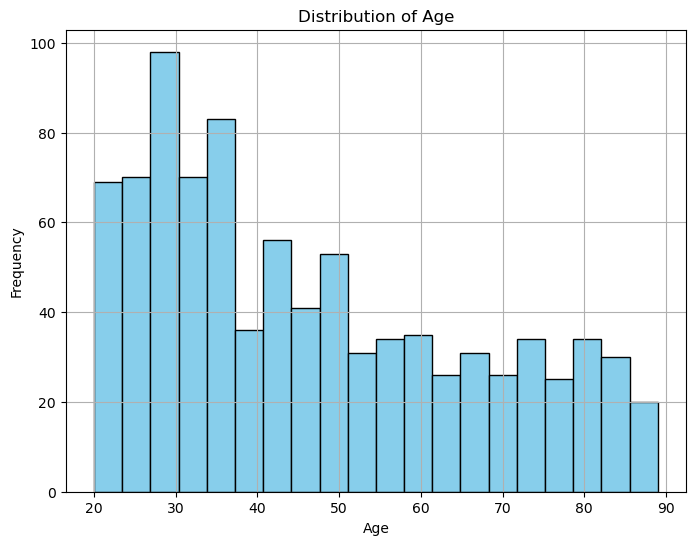

In [23]:
#Histogram for age:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

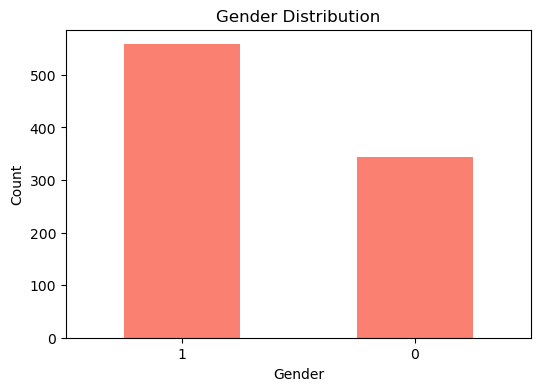

In [24]:
#Bar plot for Gender:
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color='salmon')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

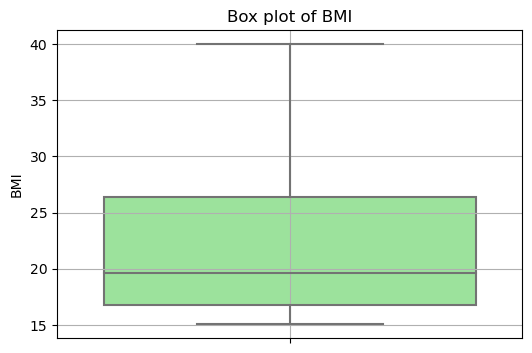

In [25]:
#Box plot for BMI
plt.figure(figsize=(6, 4))
sns.boxplot(y='BMI', data=df, color='lightgreen')
plt.title('Box plot of BMI')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

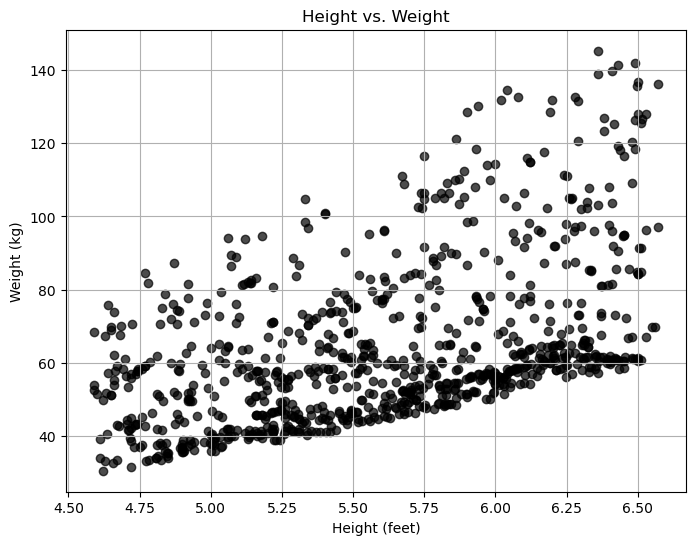

In [26]:
#scatter plot for Height and Weight:
plt.figure(figsize=(8, 6))
plt.scatter(df['Height (feet)'], df['Weight (kg)'], color='black', alpha=0.7)
plt.title('Height vs. Weight')
plt.xlabel('Height (feet)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

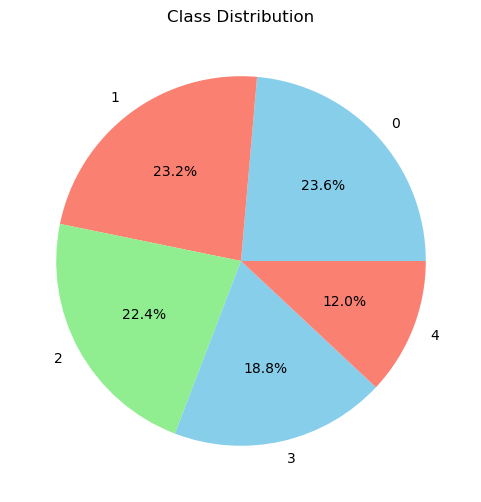

In [27]:
#Pie chart for Class distribution
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

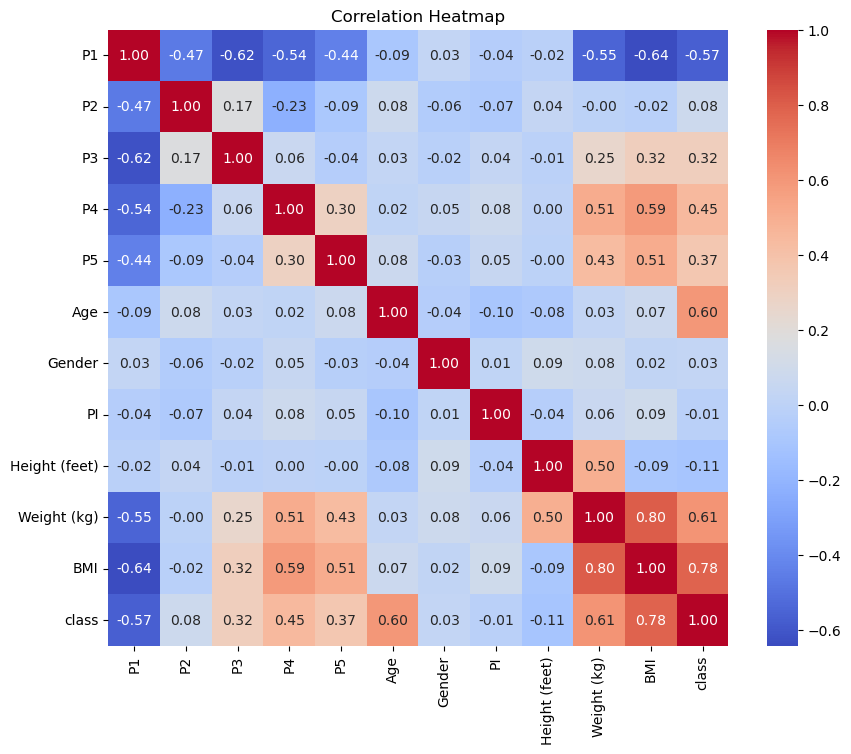

In [28]:
#Heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

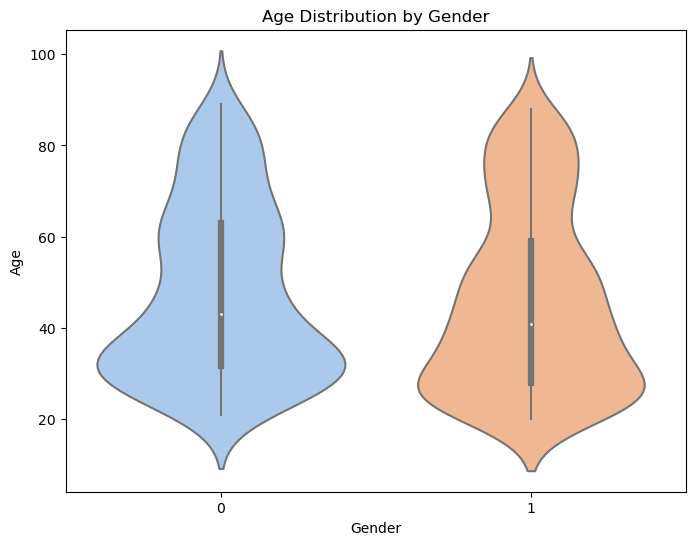

In [29]:
#Violin plot for Age distribution by Gender:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


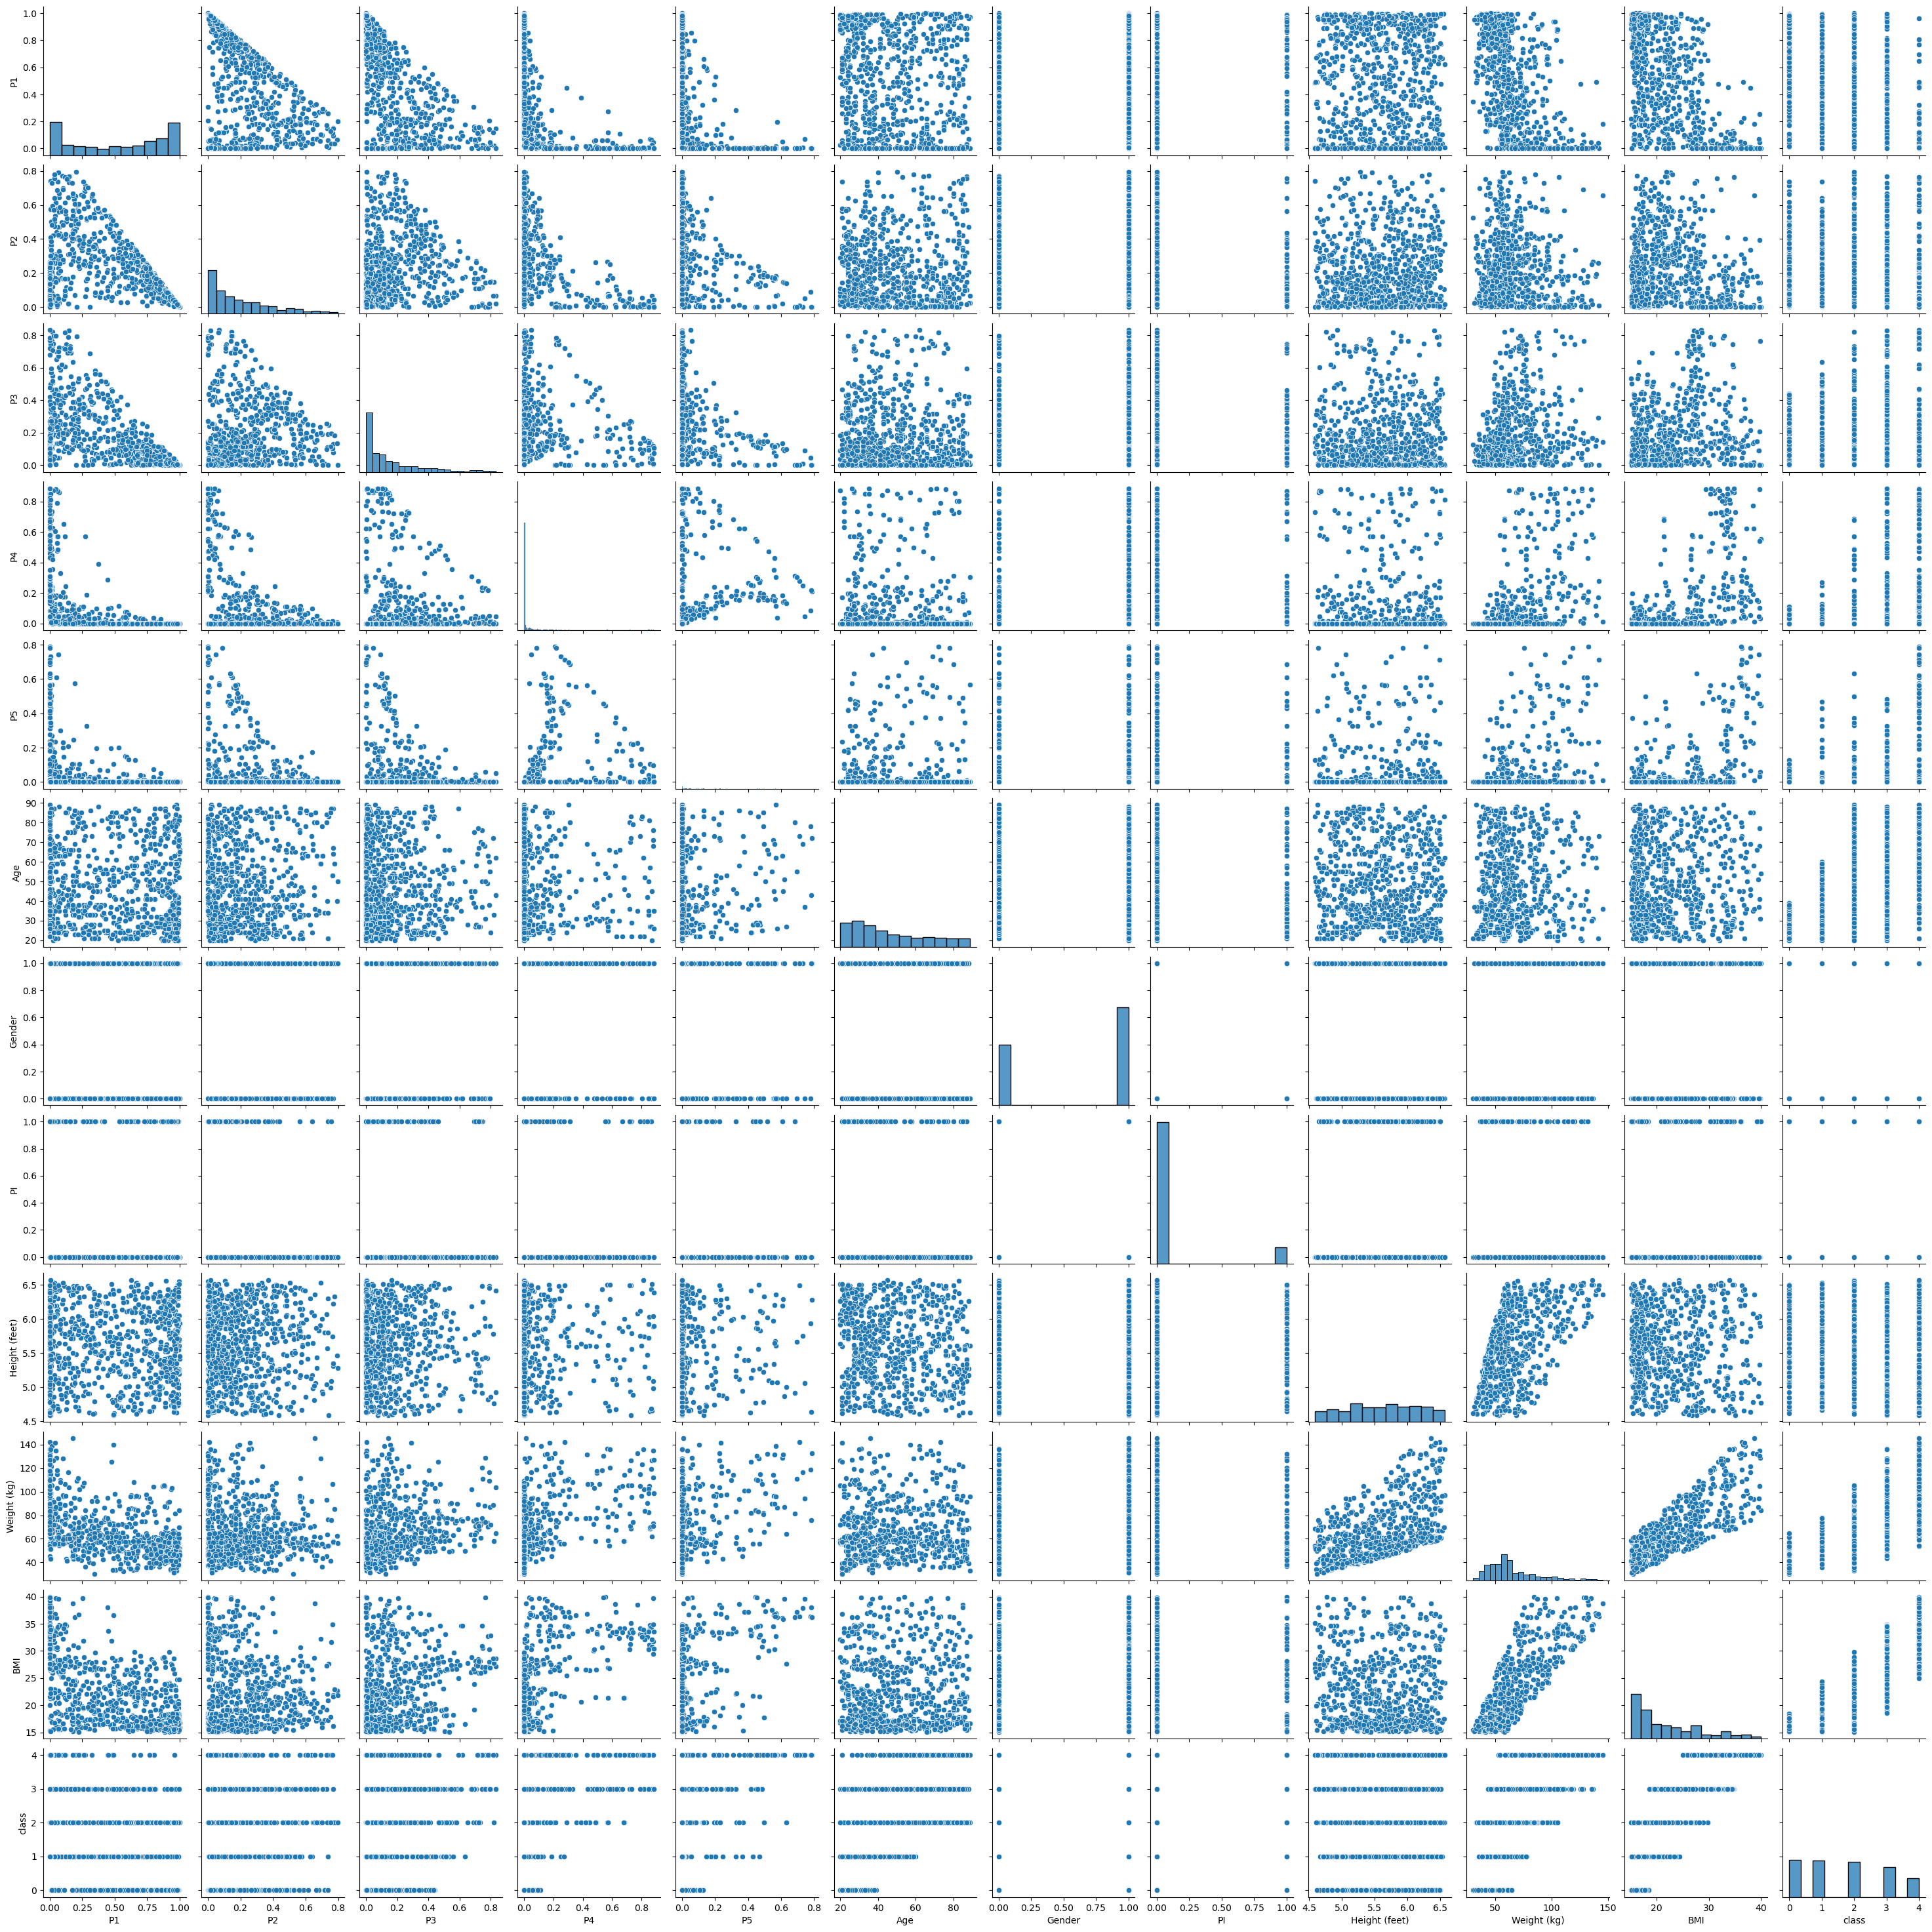

In [30]:
sns.pairplot(cleaned_df)
plt.show()

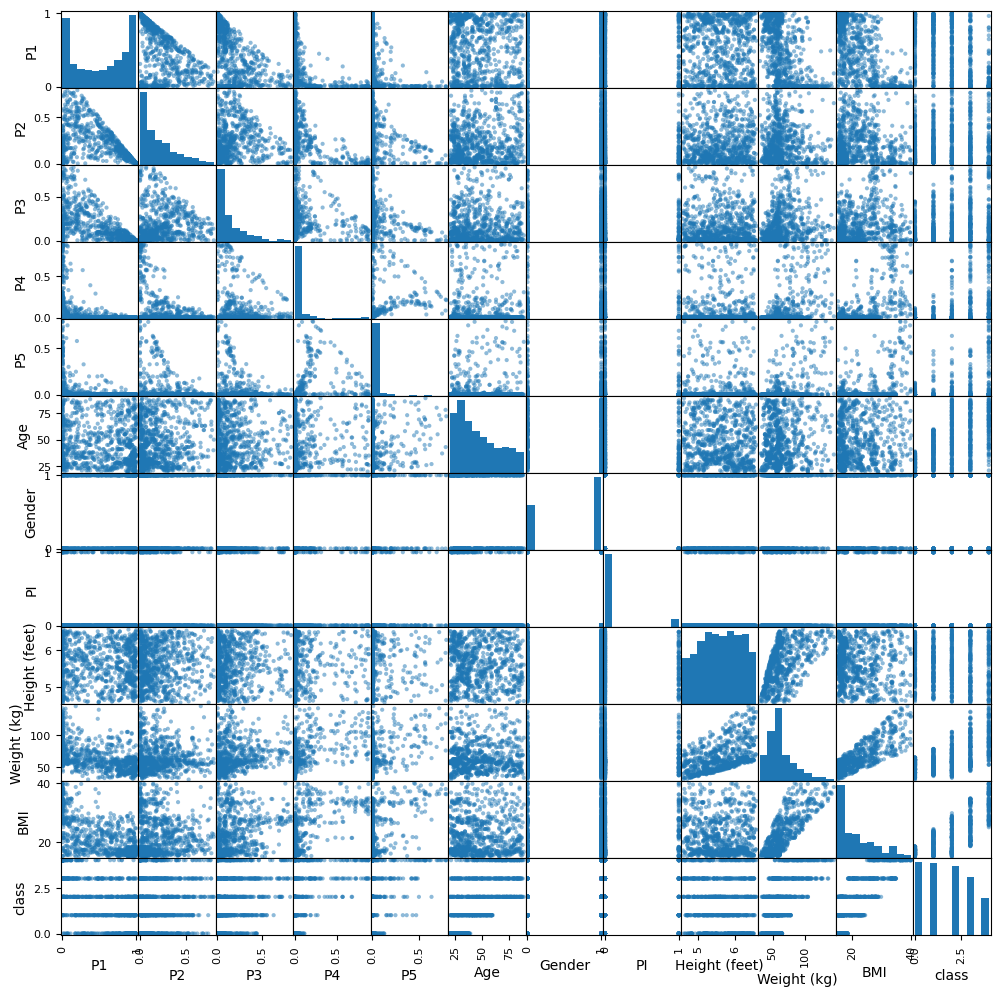

In [31]:
#scatter matrix:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

In [32]:
df

,P1,P2,P3,P4,P5,Age,Gender,PI,Height (feet),Weight (kg),BMI,class
0,0.196419,0.654267,0.148739,0.000365,0.000209,43,1,0,4.810000,61.740000,28.740000,3
1,0.681098,0.300609,0.018292,0.000001,0.000000,22,1,1,6.410000,96.090000,25.140000,2
2,0.884796,0.030187,0.085015,0.000002,0.000000,20,1,0,6.267416,104.983518,28.759499,2
3,0.639305,0.261000,0.099618,0.000074,0.000002,40,1,0,5.554528,51.653816,18.106466,1
5,0.070044,0.471333,0.383968,0.073642,0.001013,88,1,0,5.270000,68.610000,26.630000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.750385,0.186115,0.063476,0.000023,0.000001,41,1,0,5.980000,50.190000,15.130000,1
1061,0.583376,0.316212,0.100387,0.000024,0.000001,21,1,0,5.160000,57.720000,23.310000,1
1062,0.067792,0.049848,0.091686,0.046366,0.744309,37,0,0,5.060000,94.120000,39.570000,4
1063,0.006567,0.014896,0.165627,0.812876,0.000035,62,1,0,6.570000,136.140000,33.940000,4


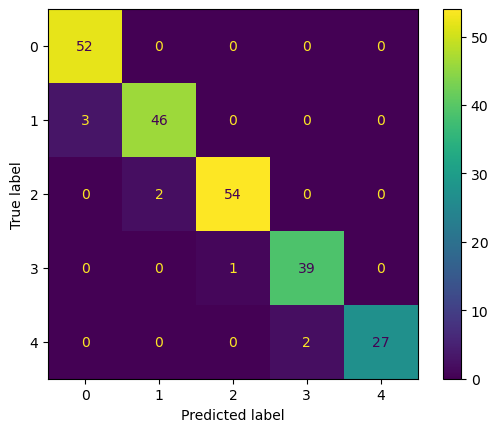

0.9646017699115044


In [33]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
columns_to_drop = ['PI','Height (feet)', 'Weight (kg)','class']
X = df.drop(columns_to_drop, axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
accuracy = knn.score(X_test, y_test) 
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()
print(accuracy)

In [34]:
import pickle
with open('Resnet_Model_to_Classify_KneeOA_Pickle','rb') as f:
    model = pickle.load(f)

In [35]:
import numpy as np
import cv2
temp=[]
image = cv2.imread('C:/Users/sahil/Unet Implementation/Knee Osteoarthritis Cartilage Segementation Using Unet/stage2_train/Grade4/9256759R.png')
image_resized = cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
temp = []
for value in pred[0]:
    processed_value = float(value.item())
    temp.append(processed_value)
print(temp)
age = int(input("Enter your Age: "))
temp.append(age)
gender_input = input("Enter your Gender (M/F): ")
gender = 0 if gender_input == "M" else 1
temp.append(gender)
pi_input = input("Do You Have any previous Injuries (Y/N): ")
pi = 0 if pi_input == "N" else 1
while True:
    try:
        height_feet = float(input("Enter your Height in Feet: "))
        break
    except ValueError:
        print("Invalid input for Height. Please enter a number.")
while True:
    try:
        weight_kg = float(input("Enter your Weight in Kg: "))
        break 
    except ValueError:
        print("Invalid input for Weight. Please enter a number.")
height_meters = height_feet * 0.3048
bmi = weight_kg / (height_meters * height_meters)
temp.append(bmi)
print(temp)
prediction = knn.predict(np.array([temp]))[0]
print(f"KNN Prediction: {prediction}")

1/1 [==============================] - 2s 2s/step
[0.00011009305308107287, 0.0037881594616919756, 0.001063911011442542, 0.003692240919917822, 0.9913456439971924]
Enter your Age: 50
Enter your Gender (M/F): F
Do You Have any previous Injuries (Y/N): N
Enter your Height in Feet: 6.7
Enter your Weight in Kg: 90
[0.00011009305308107287, 0.0037881594616919756, 0.001063911011442542, 0.003692240919917822, 0.9913456439971924, 50, 1, 21.580573346043106]
KNN Prediction: 2


C:\Users\sahil\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
